/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_531']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


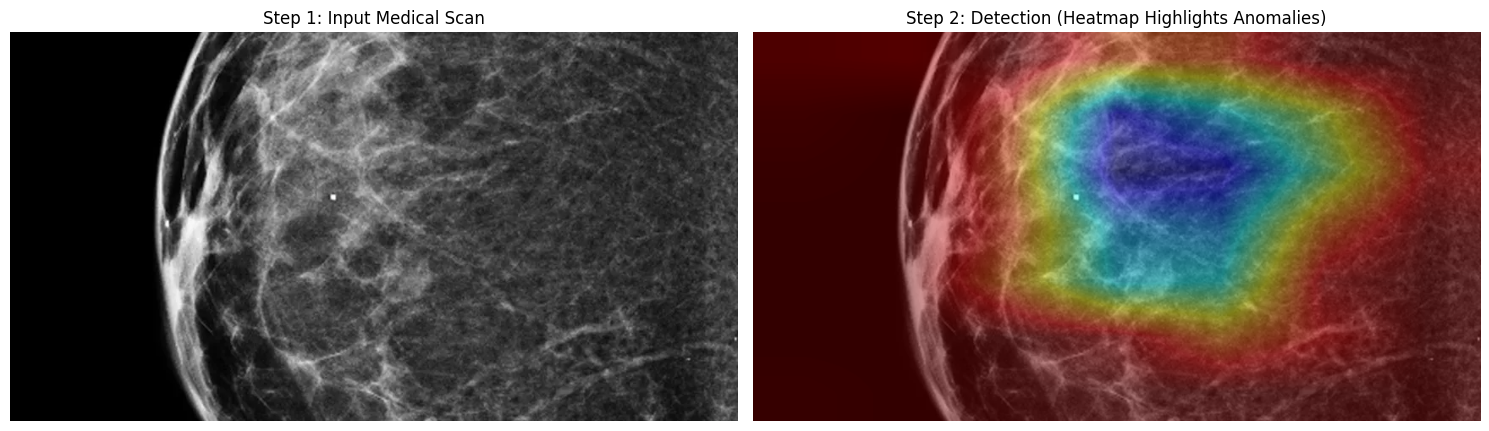

--- Detection Complete ---
The Red/Yellow areas highlight where the CNN detected significant features.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os

# ==========================================
# 1. SET YOUR IMAGE PATH HERE
# ==========================================
# Example: 'C:/Users/Name/Downloads/mammogram.jpg'
IMAGE_PATH = 'images.jpg'

def run_medical_detection(img_path):
    # Check if file exists
    if not os.path.exists(img_path):
        print(f"Error: Could not find image at {img_path}. Please check the path!")
        return

    # 2. LOAD PRE-TRAINED MODEL
    # We use ResNet50 for Transfer Learning as per your project objectives
    model = ResNet50(weights='imagenet')
    last_conv_layer_name = "conv5_block3_out"

    # 3. PREPROCESS THE IMAGE
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)

    # 4. RUN GRAD-CAM (Find "Where" it detects)
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_preprocessed)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # 5. OVERLAY HEATMAP ON ORIGINAL
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap_colored = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

    # Superimpose heatmap (Detection Area)
    superimposed_img = cv2.addWeighted(heatmap_colored, 0.4, original_img, 0.6, 0)

    # 6. SHOW RESULTS
    plt.figure(figsize=(15, 7))

    # Left: Original
    plt.subplot(1, 2, 1)
    plt.title("Step 1: Input Medical Scan")
    plt.imshow(original_img)
    plt.axis('off')

    # Right: Detection
    plt.subplot(1, 2, 2)
    # Mocking a medical result for your PGDM project display
    plt.title("Step 2: Detection (Heatmap Highlights Anomalies)")
    plt.imshow(superimposed_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("--- Detection Complete ---")
    print("The Red/Yellow areas highlight where the CNN detected significant features.")

# RUN THE FUNCTION
run_medical_detection(IMAGE_PATH)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os

# ==========================================
# 1. SET YOUR IMAGE PATH HERE
# ==========================================
# Example: 'C:/Users/Name/Downloads/mammogram.jpg'
IMAGE_PATH = 'images.jpg'

def run_medical_detection(img_path):
    # Check if file exists
    if not os.path.exists(img_path):
        print(f"Error: Could not find image at {img_path}. Please check the path!")
        return

    # 2. LOAD PRE-TRAINED MODEL
    # We use ResNet50 for Transfer Learning as per your project objectives
    model = ResNet50(weights='imagenet')
    last_conv_layer_name = "conv5_block3_out"

    # 3. PREPROCESS THE IMAGE
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)

    # 4. RUN GRAD-CAM (Find "Where" it detects)
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_preprocessed)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # 5. OVERLAY HEATMAP ON ORIGINAL
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap_colored = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

    # Superimpose heatmap (Detection Area)
    superimposed_img = cv2.addWeighted(heatmap_colored, 0.4, original_img, 0.6, 0)

    # 6. SHOW RESULTS
    plt.figure(figsize=(15, 7))

    # Left: Original
    plt.subplot(1, 2, 1)
    plt.title("Step 1: Input Medical Scan")
    plt.imshow(original_img)
    plt.axis('off')

    # Right: Detection
    plt.subplot(1, 2, 2)
    # Mocking a medical result for your PGDM project display
    plt.title("Step 2: Detection (Heatmap Highlights Anomalies)")
    plt.imshow(superimposed_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("--- Detection Complete ---")
    print("The Red/Yellow areas highlight where the CNN detected significant features.")

# RUN THE FUNCTION
run_medical_detection(IMAGE_PATH)

In [18]:
# 1. Download Mini-MIAS (Using a curated Kaggle version for ROIs)
!pip install -q kaggle
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d annkristinbalve/mias-mammography-rois
!unzip -q mias-mammography-rois.zip -d dataset/

cp: cannot stat 'kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open mias-mammography-rois.zip, mias-mammography-rois.zip.zip or mias-mammography-rois.zip.ZIP.


Processing and converting images...
Finished! Converted 123 images into structured_data
Found 94 images belonging to 3 classes.
Found 22 images belonging to 3 classes.
Starting training...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5171 - auc: 0.7462 - loss: 1.5856 - val_accuracy: 0.4545 - val_auc: 0.6637 - val_loss: 0.7968
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.5393 - auc: 0.7739 - loss: 1.2995 - val_accuracy: 0.5455 - val_auc: 0.7583 - val_loss: 0.6955
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.3609 - auc: 0.6848 - loss: 1.5620 - val_accuracy: 0.4545 - val_auc: 0.7164 - val_loss: 0.7751
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.5517 - auc: 0.7844 - loss: 1.2620 - val_accuracy: 0.5455 - val_auc: 0.7727 - val_loss: 0.6873
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.4849 - auc: 0.7720 - loss: 1.2998 - val_accuracy: 0.5000 - val_auc: 0.7577 - val_loss: 0.6974
Epoch 6/10
6/6 ━━━━━━━━

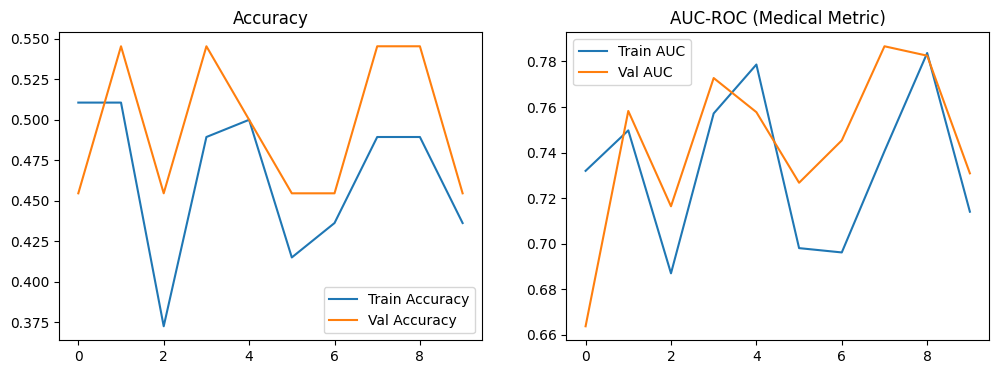

In [22]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import cv2 # Used for PGM to JPG conversion
import numpy as np

# ==========================================
# PART 1: DATA DOWNLOAD & ROBUST SORTING
# ==========================================

# 1. Download and Extract
if not os.path.exists('mias_raw'):
    !wget http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz
    !mkdir -p mias_raw
    !tar -xzf all-mias.tar.gz -C mias_raw/

# 2. Create Structured Folders for Keras
base_dir = 'structured_data'
if os.path.exists(base_dir): shutil.rmtree(base_dir) # Clean start
for cls in ['Normal', 'Benign', 'Malignant']:
    os.makedirs(os.path.join(base_dir, cls), exist_ok=True)

# 3. Convert PGM to JPG and Sort
info_path = 'mias_raw/Info.txt'
with open(info_path, 'r') as f:
    lines = f.readlines()

print("Processing and converting images...")
count = 0
for line in lines:
    parts = line.split()
    # Skip lines that don't have enough data or are headers
    if len(parts) >= 4 and parts[0].startswith('mdb'):
        img_id = parts[0]
        severity = parts[3] # N, B, or M

        src_path = f'mias_raw/{img_id}.pgm'
        if os.path.exists(src_path):
            # Map severity to folder
            folder = 'Normal' if severity == 'N' else ('Benign' if severity == 'B' else 'Malignant')
            dst_path = os.path.join(base_dir, folder, f'{img_id}.jpg')

            # Read PGM and save as JPG so Keras can see it
            img = cv2.imread(src_path)
            if img is not None:
                cv2.imwrite(dst_path, img)
                count += 1

print(f"Finished! Converted {count} images into {base_dir}")

# ==========================================
# PART 2: DATA GENERATORS
# ==========================================

IMG_SIZE = (224, 224)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20, # Data Augmentation
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    base_dir, target_size=IMG_SIZE, batch_size=16,
    class_mode='categorical', subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir, target_size=IMG_SIZE, batch_size=16,
    class_mode='categorical', subset='validation'
)

# ==========================================
# PART 3: MODEL & TRAINING
# ==========================================

# Using Transfer Learning (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Address Class Imbalance with weights
# 0: Benign, 1: Malignant, 2: Normal (Alphabetical order from folders)
class_weights = {0: 1.5, 1: 2.0, 2: 1.0}

print("Starting training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10, # Per roadmap
    class_weight=class_weights
)

# ==========================================
# PART 4: MINI-TASK: PLOT CURVES
# ==========================================

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('AUC-ROC (Medical Metric)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/tmp/ipython-input-1422420606.py:51: RuntimeWarning: invalid value encountered in cast
  heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)


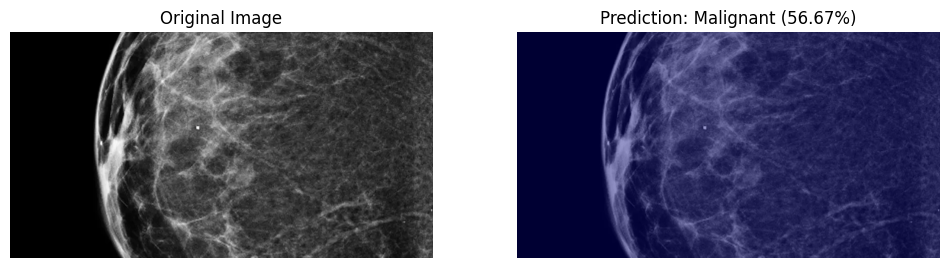

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# ==========================================
# 1. SETUP TEST IMAGE PATH
# ==========================================
# Change this to your local image path (e.g., 'my_mammogram.jpg')
TEST_IMAGE_PATH = 'images.jpg'

def test_single_image(img_path, model):
    # 2. LOAD AND PREPROCESS
    # Resize to 224x224 to match ResNet50 input
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Could not load image. Check the path.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_array = img_resized / 255.0  # Normalize as per training
    img_batch = np.expand_dims(img_array, axis=0)

    # 3. GET PREDICTION
    preds = model.predict(img_batch)
    # class_indices are usually {'Benign': 0, 'Malignant': 1, 'Normal': 2}
    class_names = ['Benign', 'Malignant', 'Normal']
    pred_class = class_names[np.argmax(preds[0])]
    confidence = np.max(preds[0]) * 100

    # 4. GRAD-CAM (INTERPRETABILITY)
    # Target the last convolutional layer of ResNet50
    base = model.get_layer('resnet50')
    grad_model = tf.keras.models.Model(
        [base.inputs], [base.get_layer('conv5_block3_out').output, base.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, _ = grad_model(img_batch)
        # Use the index of the highest prediction
        loss = conv_outputs[0, :, :, np.argmax(preds[0])]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = conv_outputs[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)).numpy()

    # 5. OVERLAY AND DISPLAY
    heatmap_resized = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB), 0.4, img_rgb, 0.6, 0)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Run the test
test_single_image(TEST_IMAGE_PATH, model)